### Diabetes Prediction using machine learning

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from mlxtend.plotting import plot_decision_regions

In [6]:
type(sns.set())

NoneType

In [7]:
print(sns.set())

None


In [8]:
sns.set()

In [9]:
import warnings

In [10]:
warnings.filterwarnings("ignore")

In [11]:
%matplotlib inline

### Basic Data Science and dML pipeline

In [12]:
diabetes_data = pd.read_csv("diabetes.csv")    # loading the dataset

In [13]:
diabetes_data.head()                  # print the first five row of dataset

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### Basic EDA and statistical analysis

In [14]:
# gives information about the data types, columns, null value counts, memory usage, etc

diabetes_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
# basic statistics details about the data, only numerical columns would be displayed, unless
# we use parametes like include = "all"

diabetes_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [18]:
diabetes_data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [22]:
diabetes_data.transpose()

0       1        2       3        4        5    \
Pregnancies                 6.000   1.000    8.000   1.000    0.000    5.000   
Glucose                   148.000  85.000  183.000  89.000  137.000  116.000   
BloodPressure              72.000  66.000   64.000  66.000   40.000   74.000   
SkinThickness              35.000  29.000    0.000  23.000   35.000    0.000   
Insulin                     0.000   0.000    0.000  94.000  168.000    0.000   
BMI                        33.600  26.600   23.300  28.100   43.100   25.600   
DiabetesPedigreeFunction    0.627   0.351    0.672   0.167    2.288    0.201   
Age                        50.000  31.000   32.000  21.000   33.000   30.000   
Outcome                     1.000   0.000    1.000   0.000    1.000    0.000   

                             6        7        8        9    ...      758  \
Pregnancies                3.000   10.000    2.000    8.000  ...    1.000   
Glucose                   78.000  115.000  197.000  125.000  ...  106.000   
BloodPressure             50.000    0.000   70.000   96.000  ...   76.000   
SkinThickness             32.000    0.000   45.000    0.000  ...    0.000   
Insulin                   88.000    0.000  543.000    0.000  ...    0.000   
BMI                       31.000   35.300   30.500    0.000  ...   37.500   
DiabetesPedigreeFunction   0.248    0.134    0.158    0.232  ...    0.197   
Age                       26.000   29.000   53.000   54.000  ...   26.000   
Outcome                    1.000    0.000    1.000    1.000  ...    0.000   

                              759     760      761     762      763     764  \
Pregnancies                 6.000   2.000    9.000   9.000   10.000    2.00   
Glucose                   190.000  88.000  170.000  89.000  101.000  122.00   
BloodPressure              92.000  58.000   74.000  62.000   76.000   70.00   
SkinThickness               0.000  26.000   31.000   0.000   48.000   27.00   
Insulin                     0.000  16.000    0.000   0.000  180.000    0.00   
BMI                        35.500  28.400   44.000  22.500   32.900   36.80   
DiabetesPedigreeFunction    0.278   0.766    0.403   0.142    0.171    0.34   
Age                        66.000  22.000   43.000  33.000   63.000   27.00   
Outcome                     1.000   0.000    1.000   0.000    0.000    0.00   

                              765      766     767  
Pregnancies                 5.000    1.000   1.000  
Glucose                   121.000  126.000  93.000  
BloodPressure              72.000   60.000  70.000  
SkinThickness              23.000    0.000  31.000  
Insulin                   112.000    0.000   0.000  
BMI                        26.200   30.100  30.400  
DiabetesPedigreeFunction    0.245    0.349   0.315  
Age                        30.000   47.000  23.000  
Outcome                     0.000    1.000   0.000  

[9 rows x 768 columns]

In [24]:
diabetes_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [27]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [29]:
diabetes_data[diabetes_data["SkinThickness"] == 0]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2              8      183             64              0        0  23.3   
5              5      116             74              0        0  25.6   
7             10      115              0              0        0  35.3   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
..           ...      ...            ...            ...      ...   ...   
757            0      123             72              0        0  36.3   
758            1      106             76              0        0  37.5   
759            6      190             92              0        0  35.5   
762            9       89             62              0        0  22.5   
766            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
2                       0.672   32        1  
5                       0.201   30        0  
7                       0.134   29        0  
9                       0.232   54        1  
10                      0.191   30        0  
..                        ...  ...      ...  
757                     0.258   52        1  
758                     0.197   26        0  
759                     0.278   66        1  
762                     0.142   33        0  
766                     0.349   47        1  

[227 rows x 9 columns]

In [32]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [33]:
dict1 = {'A':[1,2,0], 'B':[2,0,3]}

In [36]:
pd.DataFrame(dict1).replace(0,np.nan)

A    B
0  1.0  2.0
1  2.0  NaN
2  NaN  3.0

In [39]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [41]:
# In this dataframe, there are zeros in some columns which is not possible, so we have to reaplce then first
# with null value and after that we can deal with it.
try:
    diabetes_data_copy = diabetes_data.copy(deep = True)     # creating copy of the dataset
    # replacing zeros with null value
    
    diabetes_data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = diabetes_data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0, np.nan)
except Exception as e:
    print(e)



In [42]:
diabetes_data_copy.isnull().sum()        # getting number of null values in each column

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [43]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

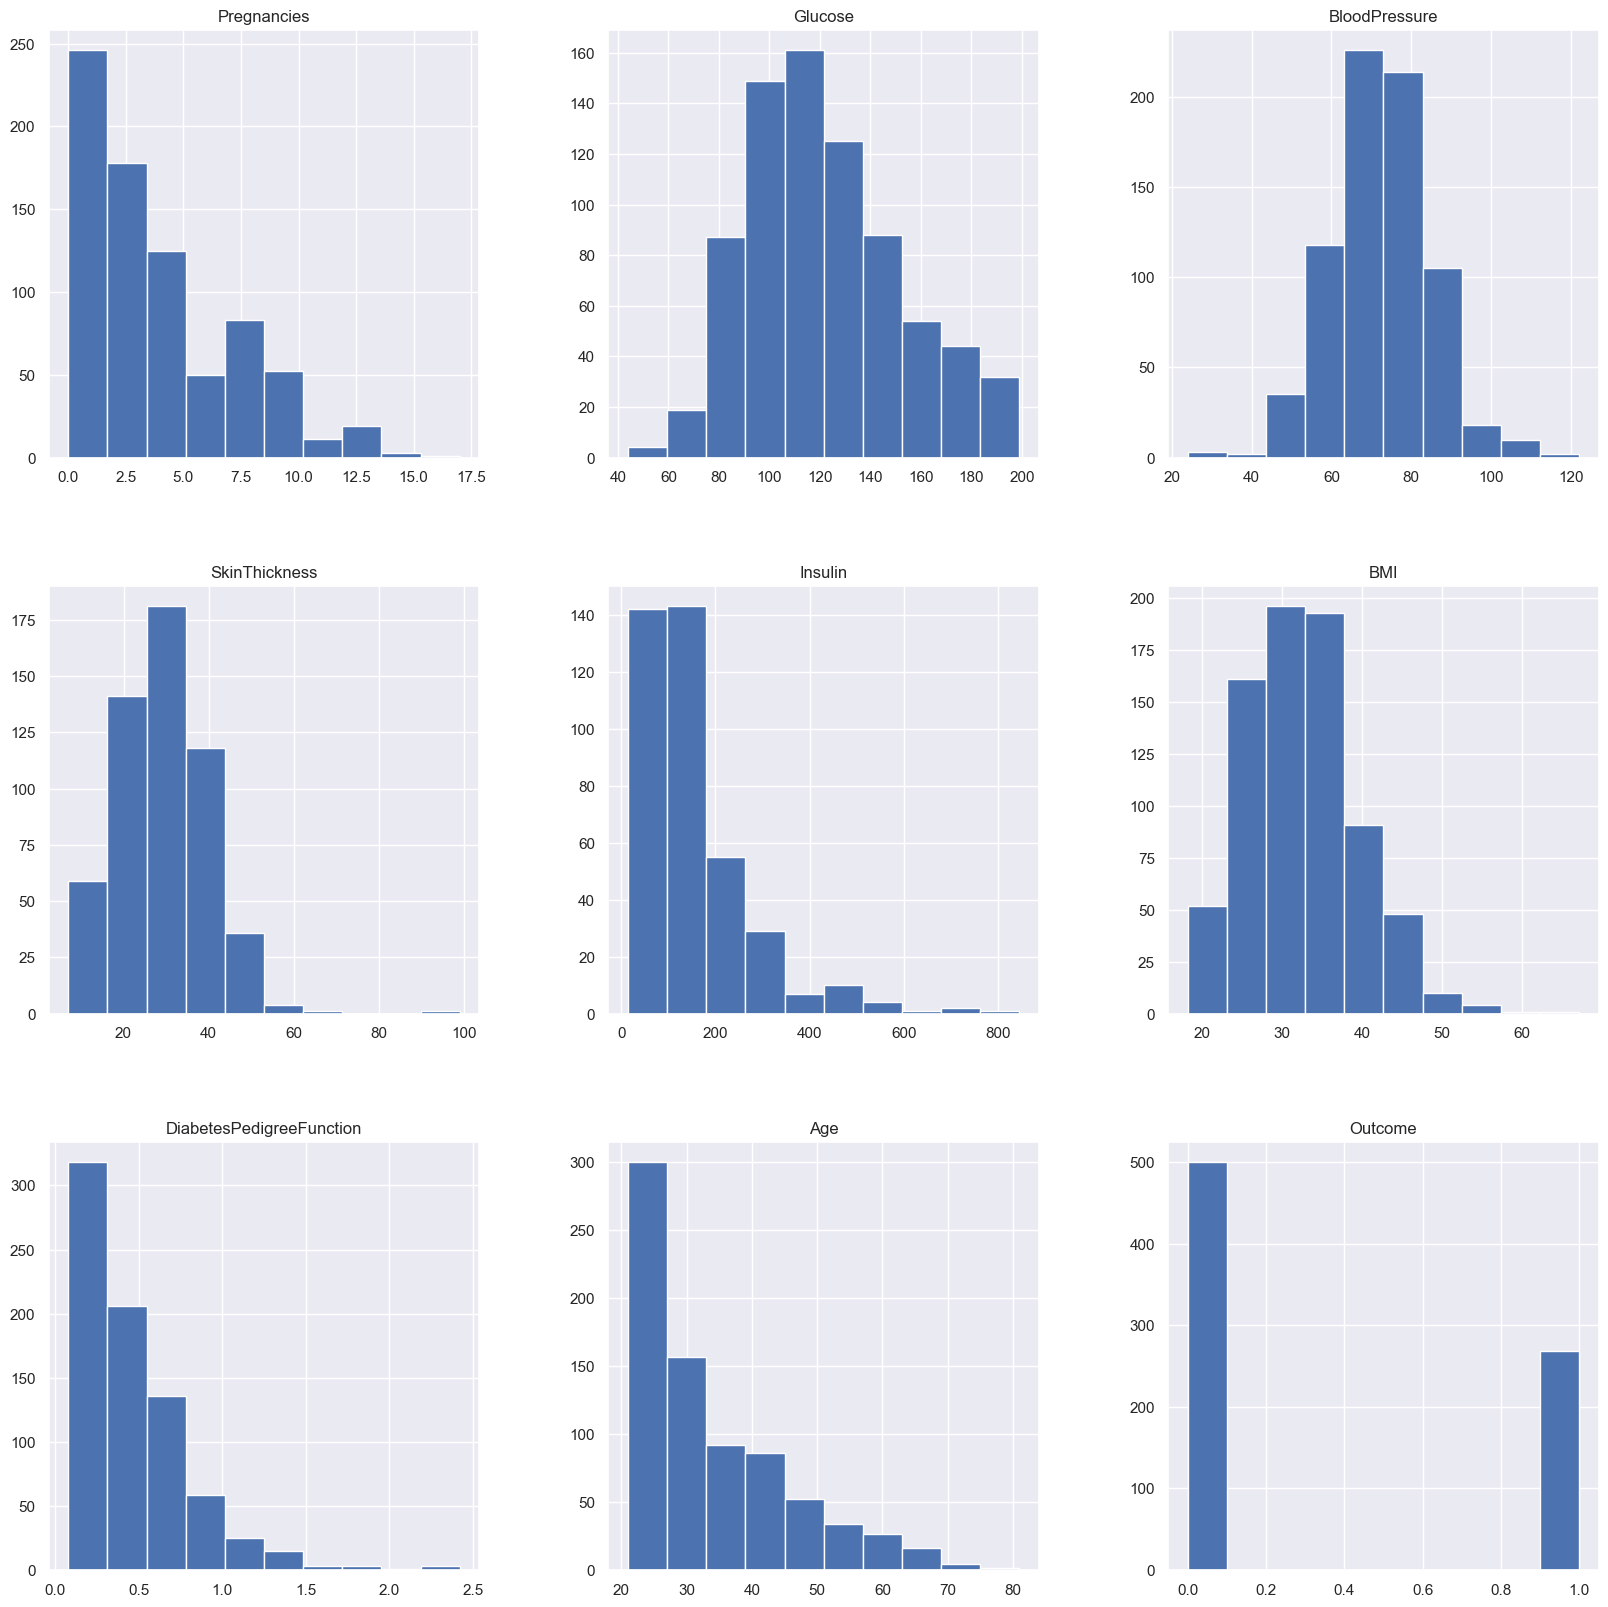

In [45]:
# Now it is not practical to drop null values all the time, so we need the data distribution to fill these null value

p = diabetes_data_copy.hist(figsize = (20,20))

In [47]:
diabetes_data_copy["Insulin"].max()

846.0

In [48]:
diabetes_data_copy["SkinThickness"].max()

99.0

In [49]:
diabetes_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [50]:
diabetes_data_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [51]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [52]:
diabetes_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [56]:
diabetes_data_copy["Glucose"].isnull().size

768

In [59]:
diabetes_data_copy["Glucose"].mean()

121.6867627785059

In [60]:
diabetes_data_copy["Glucose"].fillna(diabetes_data_copy["Glucose"].mean(), inplace = True)

In [66]:
diabetes_data_copy[diabetes_data_copy["Glucose"] == 121].size

54

In [67]:
diabetes_data_copy.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [68]:
diabetes_data_copy["BloodPressure"].fillna(diabetes_data_copy["BloodPressure"].mean(), inplace=True)

In [69]:
diabetes_data_copy.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [70]:
diabetes_data_copy["SkinThickness"].fillna(diabetes_data_copy["SkinThickness"].median(), inplace=True)

In [71]:
diabetes_data_copy.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [72]:
diabetes_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [74]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [75]:
diabetes_data_copy["Insulin"].fillna(diabetes_data_copy["Insulin"].median(), inplace=True)

In [76]:
diabetes_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [77]:
diabetes_data_copy["BMI"].fillna(diabetes_data_copy["BMI"].median(), inplace=True)

In [79]:
diabetes_data_copy.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [80]:
# Finally we have imputed all the missing values

### Plotting after removing all the nan values

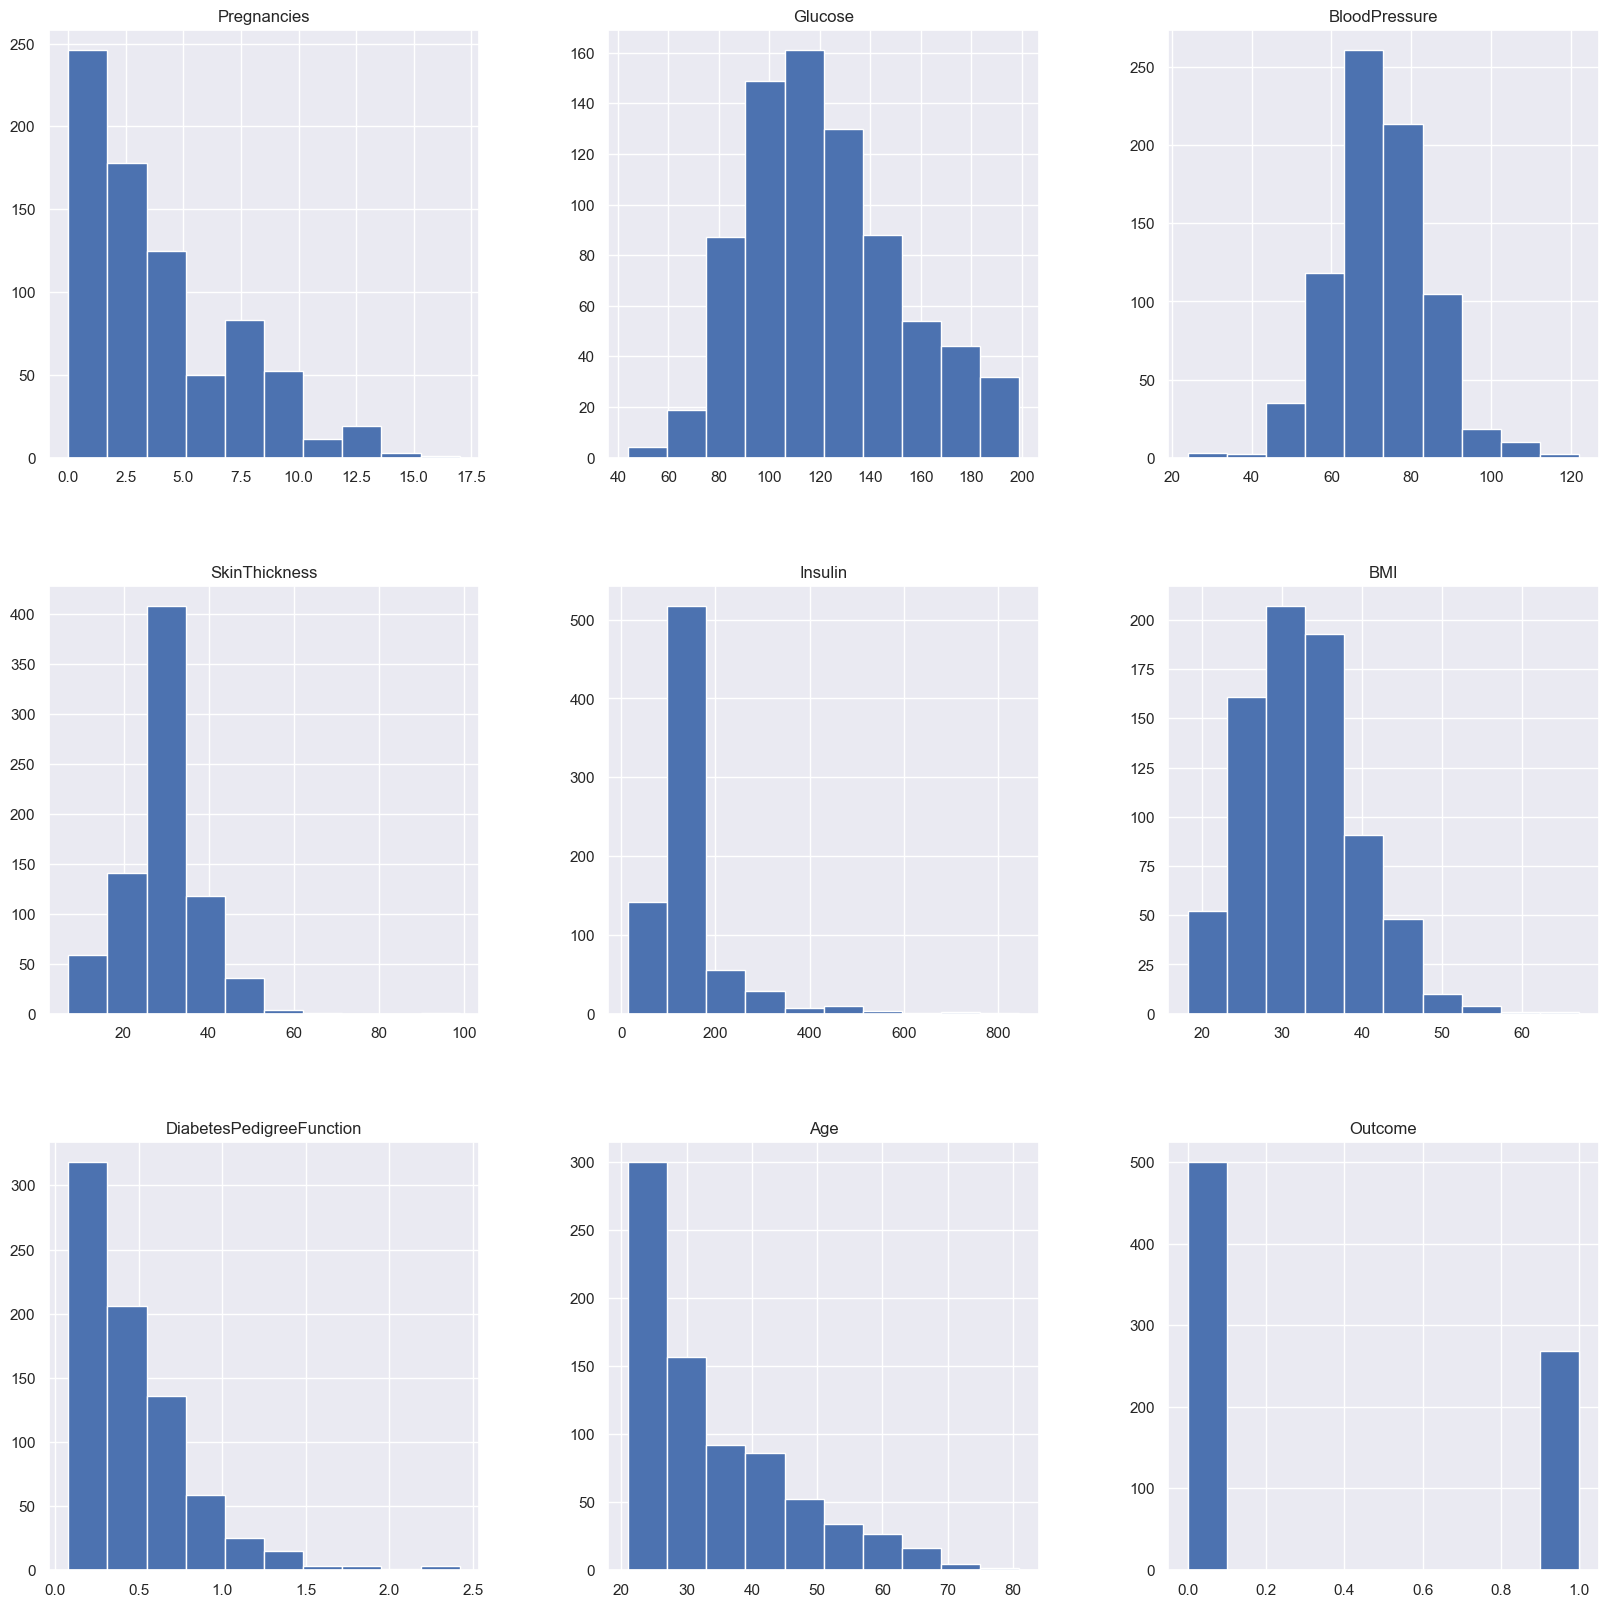

In [81]:
p = diabetes_data_copy.hist(figsize=(20,20))

In [83]:
# lets understand shewness

In [84]:
# Observing the shape of the data

In [85]:
diabetes_data.shape

(768, 9)

In [86]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [88]:
diabetes_data_copy.shape

(768, 9)

In [89]:
diabetes_data_copy.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [90]:
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [91]:
# null count analysis

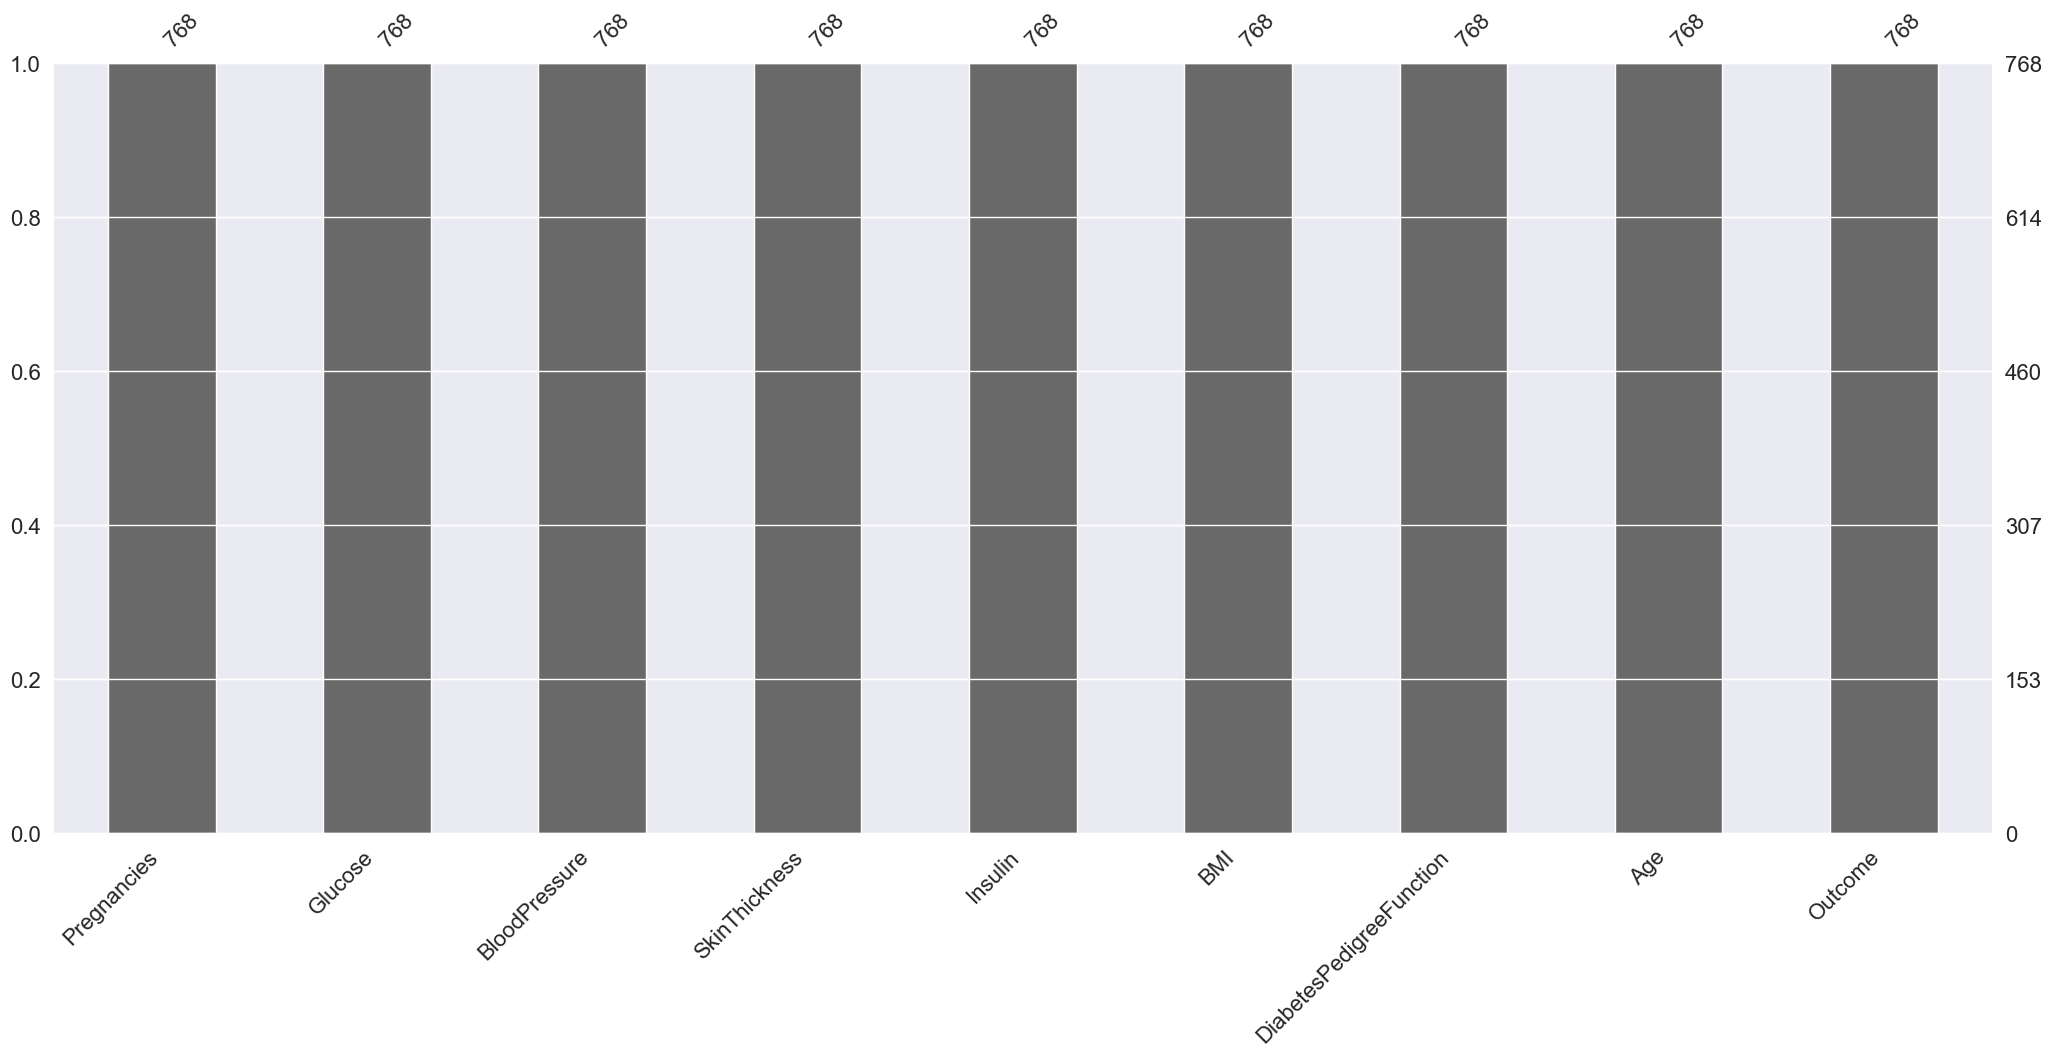

In [93]:
import missingno as msno

p = msno.bar(diabetes_data)

<AxesSubplot:>

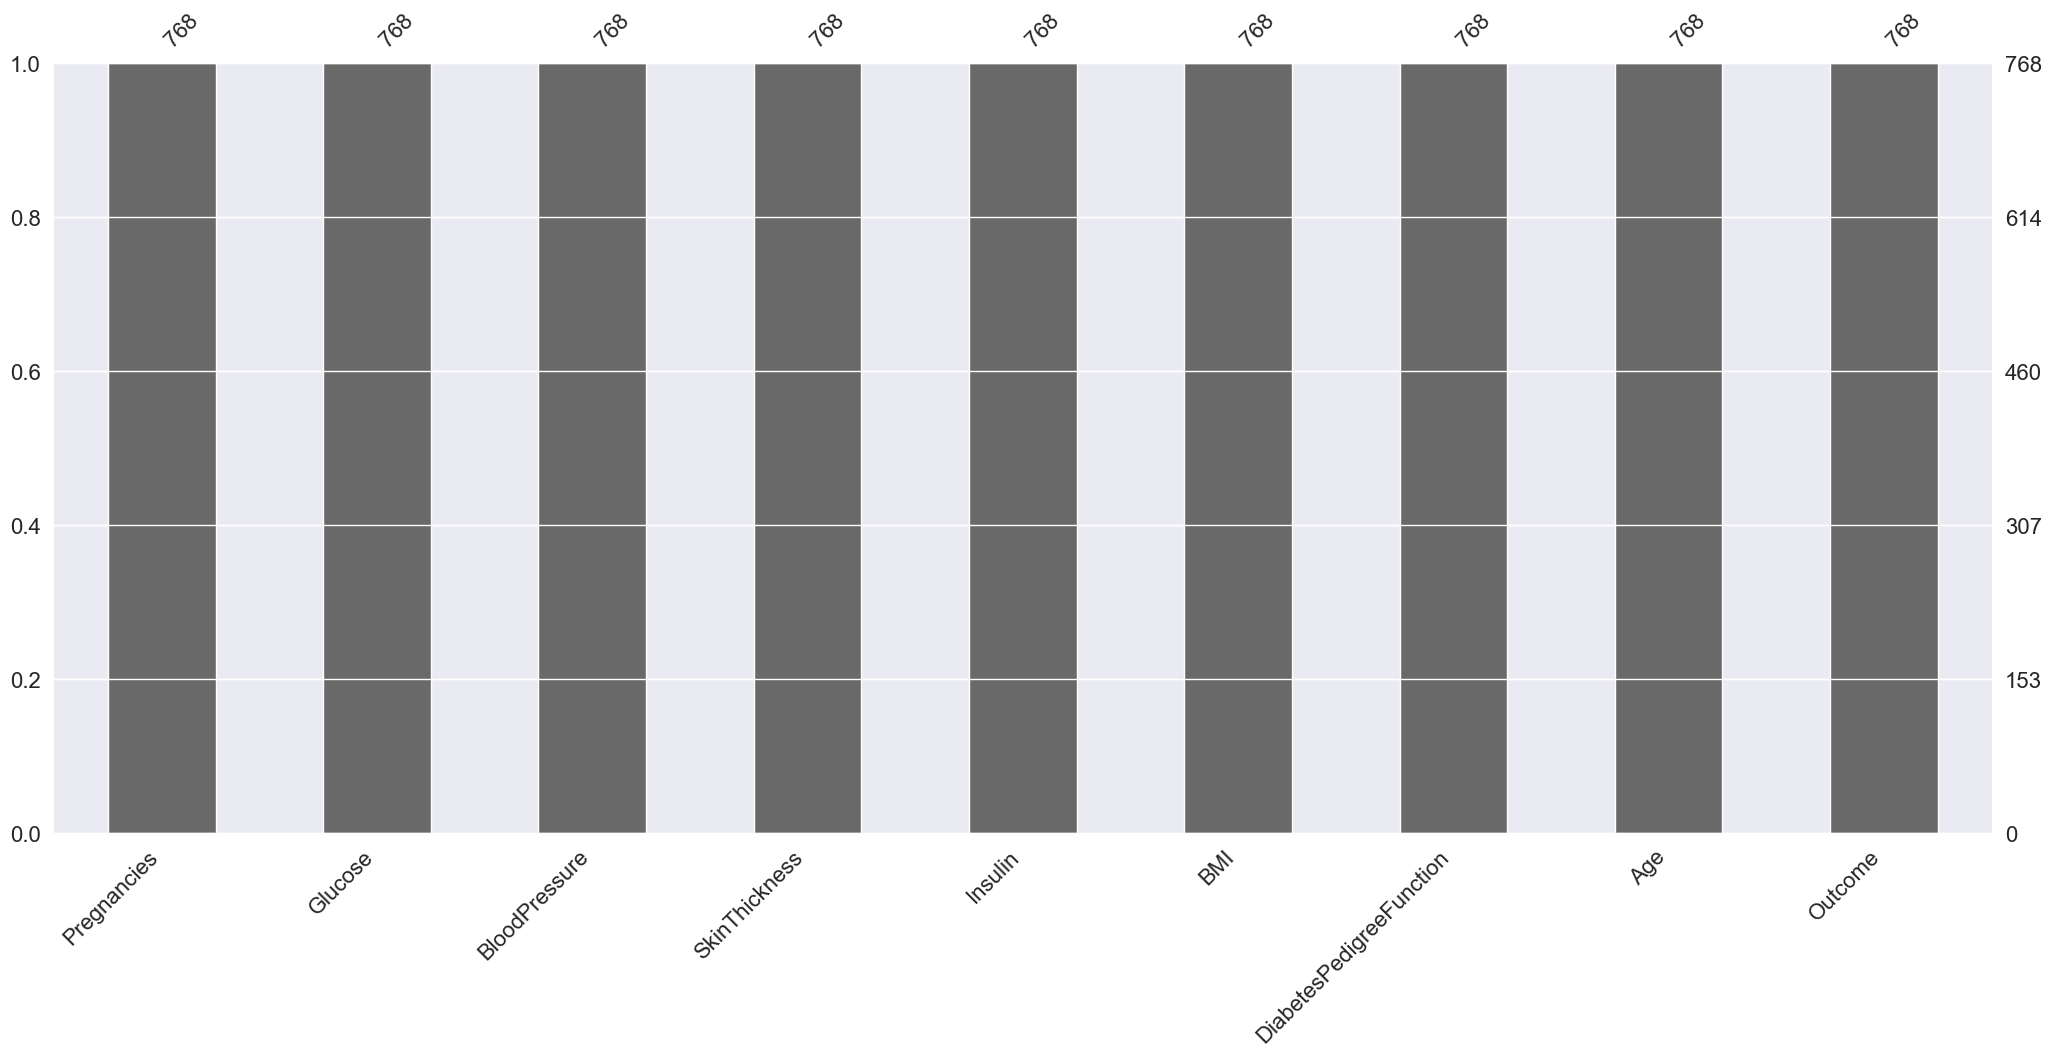

In [100]:
msno.bar(diabetes_data_copy)

In [101]:
## checking the balance of the data by plotting of outcomes by their values

color_wheel = {1:"#392cf",
               2:"7bc043"}   # a dictionary



In [102]:
color_wheel

{1: '#392cf', 2: '7bc043'}

In [103]:
type(color_wheel)

dict

In [104]:
diabetes_data["Outcome"].map(lambda x: color_wheel.get(x+1))

0      7bc043
1      #392cf
2      7bc043
3      #392cf
4      7bc043
        ...  
763    #392cf
764    #392cf
765    #392cf
766    7bc043
767    #392cf
Name: Outcome, Length: 768, dtype: object

In [105]:
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x+1))

In [106]:
colors

0      7bc043
1      #392cf
2      7bc043
3      #392cf
4      7bc043
        ...  
763    #392cf
764    #392cf
765    #392cf
766    7bc043
767    #392cf
Name: Outcome, Length: 768, dtype: object

In [107]:
type(colors)

pandas.core.series.Series

In [108]:
diabetes_data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

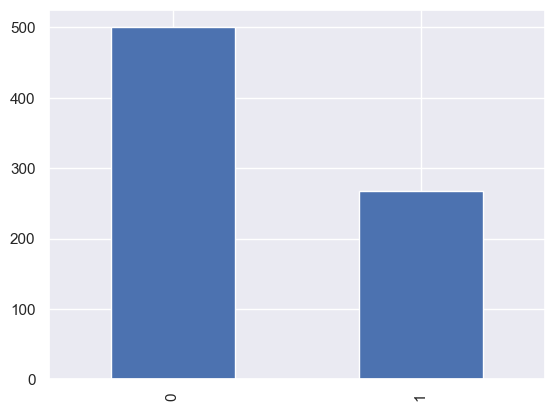

In [125]:
diabetes_data["Outcome"].value_counts().plot(kind="bar")

In [123]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### Scatter matrix based on uncleaned data

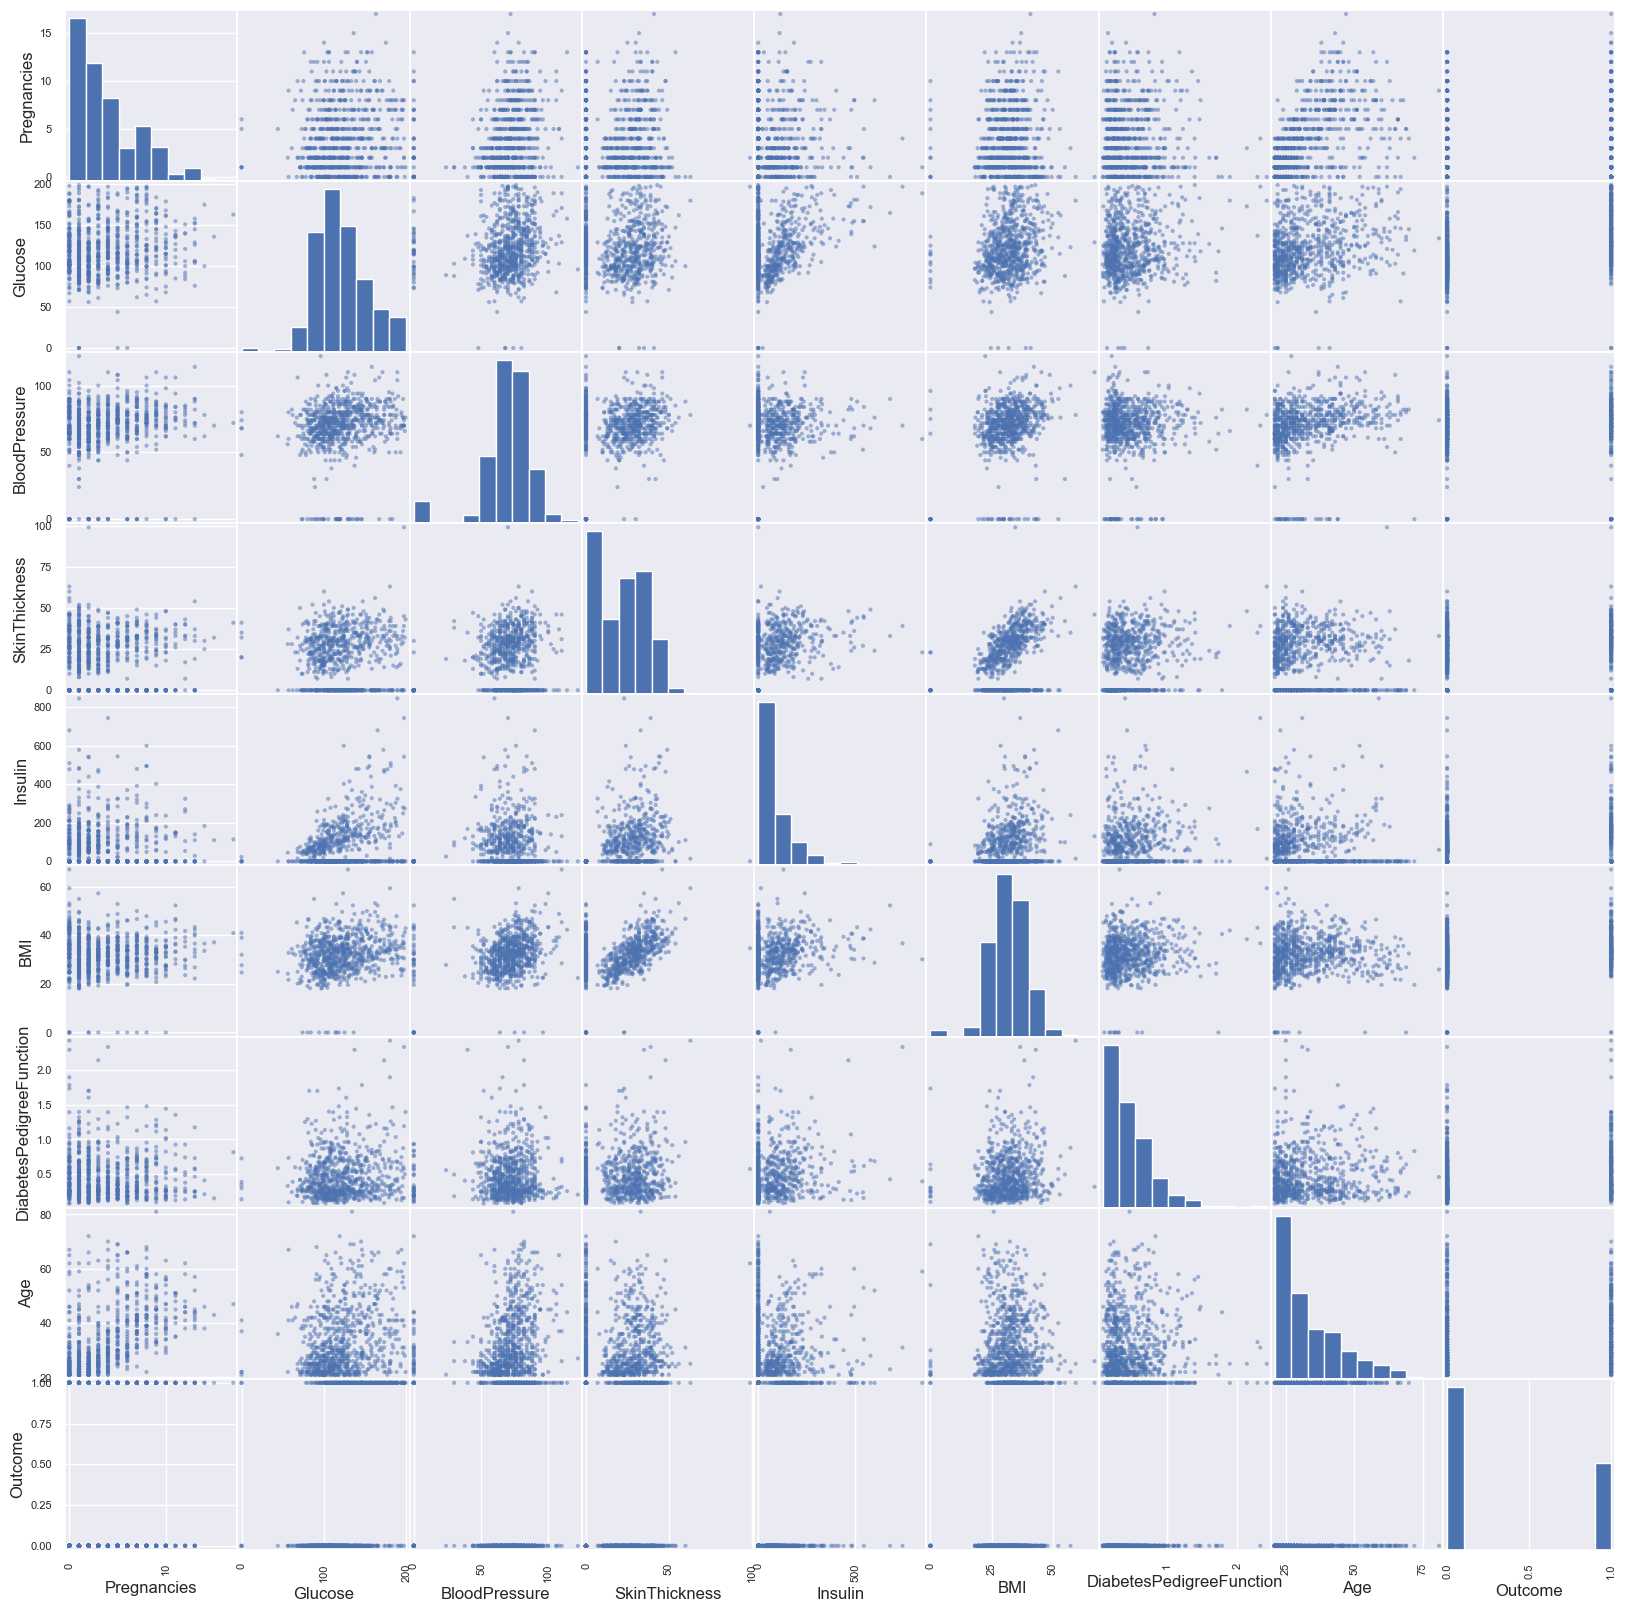

In [130]:
from pandas.plotting import scatter_matrix

p = scatter_matrix(diabetes_data, figsize = (20,20), grid=True)

In [131]:
# pair plots build on 2 basic figures, the histogram and scatter plot, 

# the histogram on the diagonal allows us to see the distribution of single variable while...

# the scatter plot in upper and lower triangle show the relationship between two variables

### pair plot for clean variable

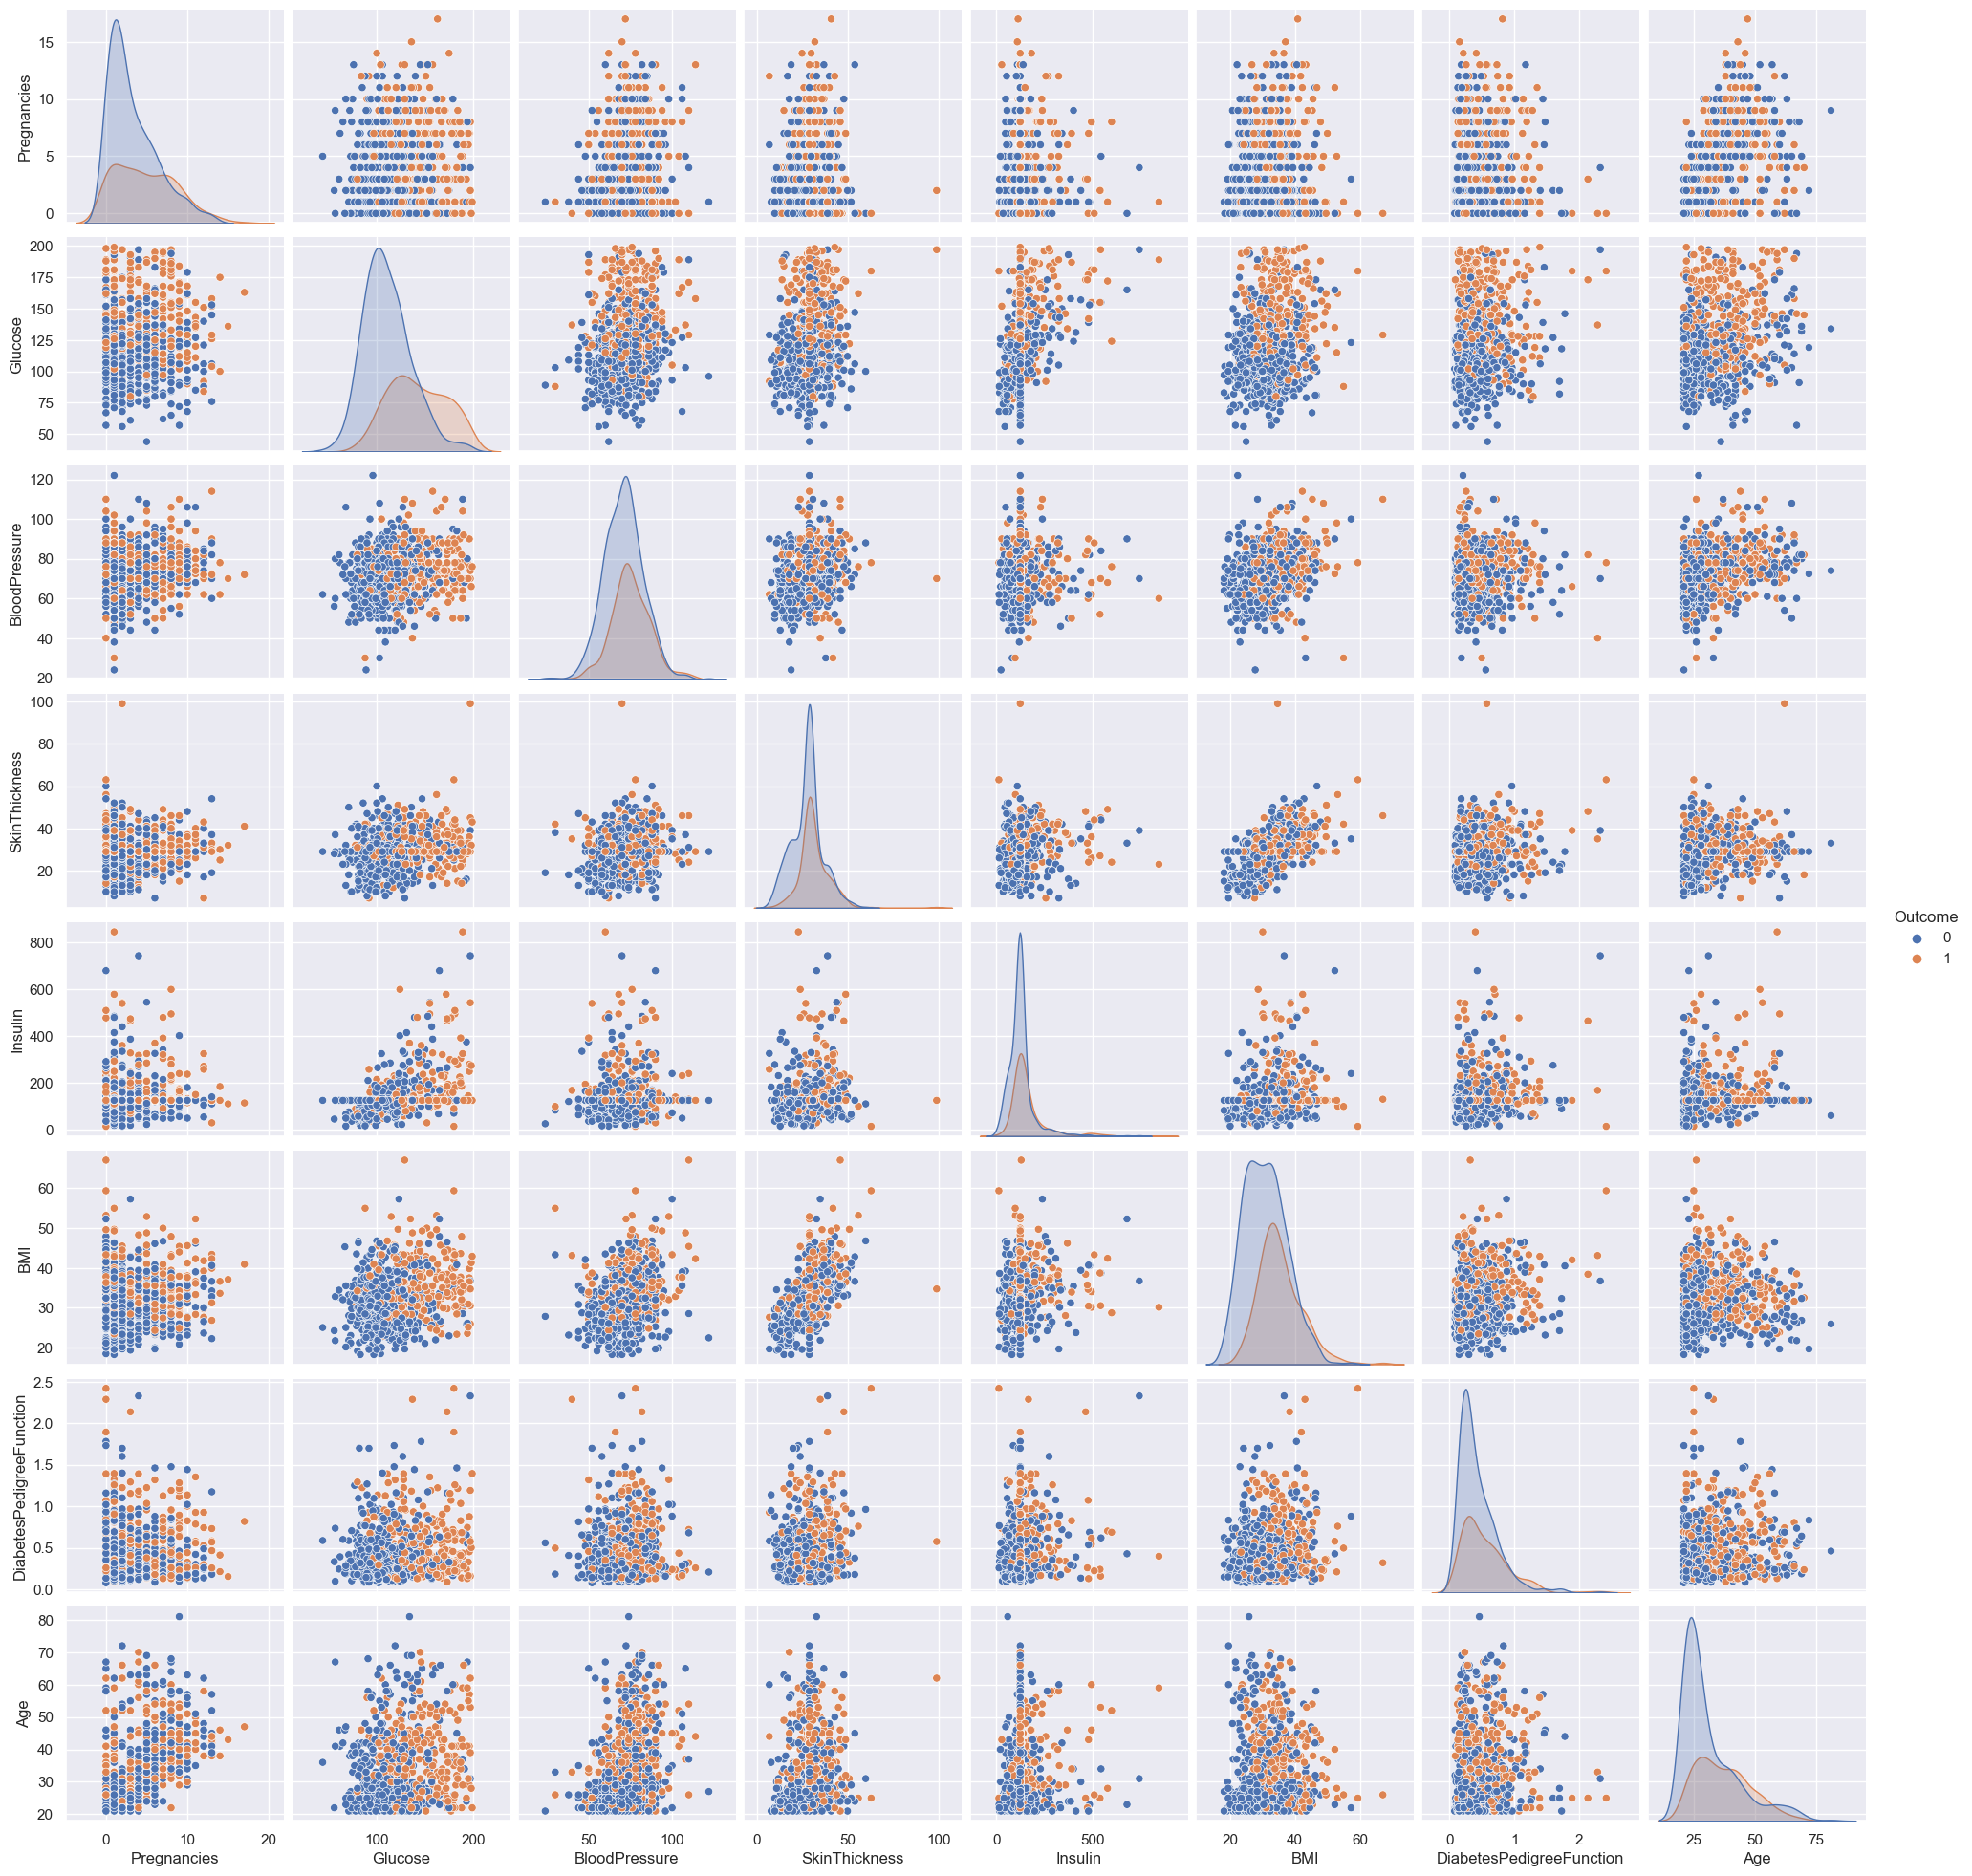

In [136]:
p = sns.pairplot(diabetes_data_copy, hue = "Outcome")

In [137]:
# Pearson's correlation coeficient: helps you find out the relationship between two quantities.
# It gives you the measure of the strength of the association between two variables. The value 
# of pearson's correlation coefficient can be between -1 to +1. 1 means that they are highly 
# correlated and 0 means no correlation.

In [138]:
# a heat-map is a two dimenssional representation of information with the help of colors. Heat map
# helps user to visualise simple and complex information

### Heat map for unclean data

<AxesSubplot:>

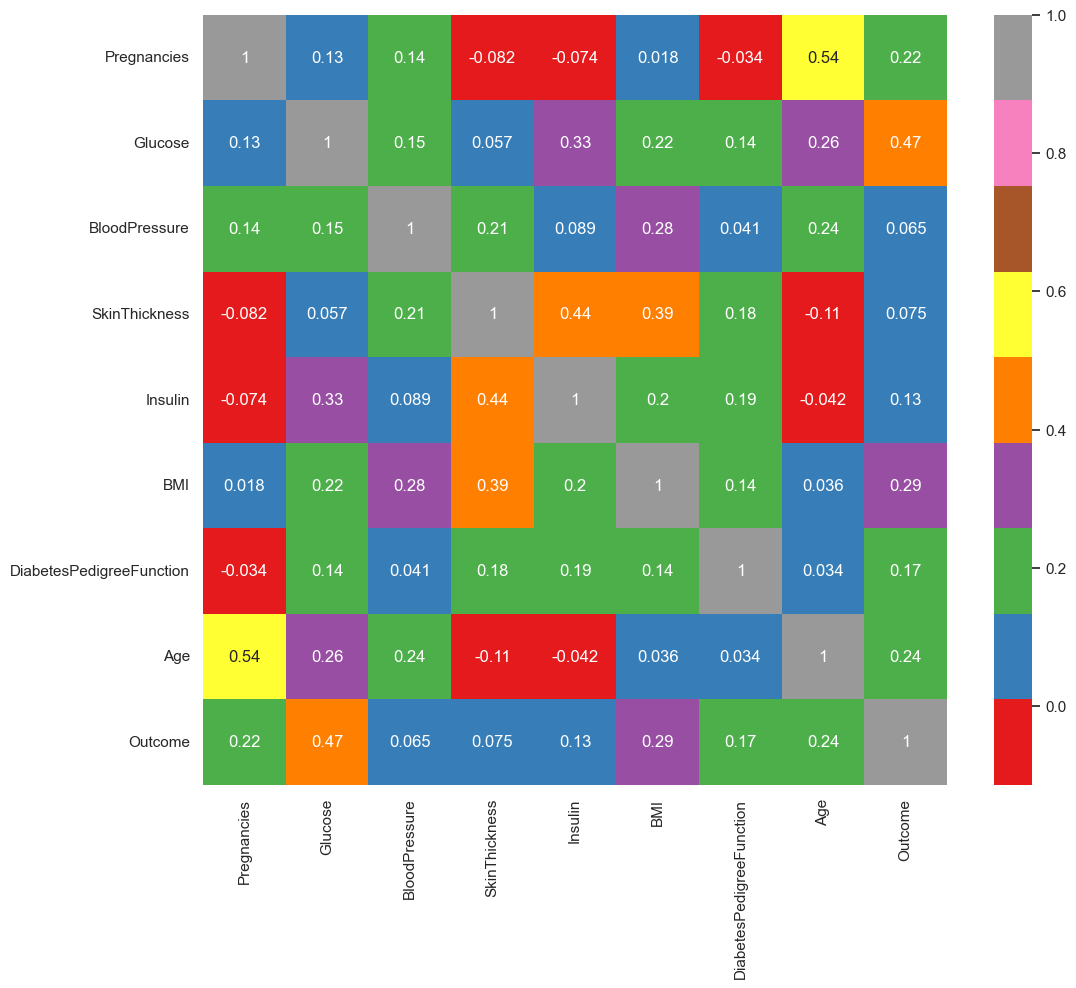

In [142]:
plt.figure(figsize=(12,10))
# on this line I just set the size of figure to 20 by 20

sns.heatmap(diabetes_data.corr(), annot=True, cmap="Set1")

# seaborn has very simple solution to heatmap

### Heat map for clean data

<AxesSubplot:>

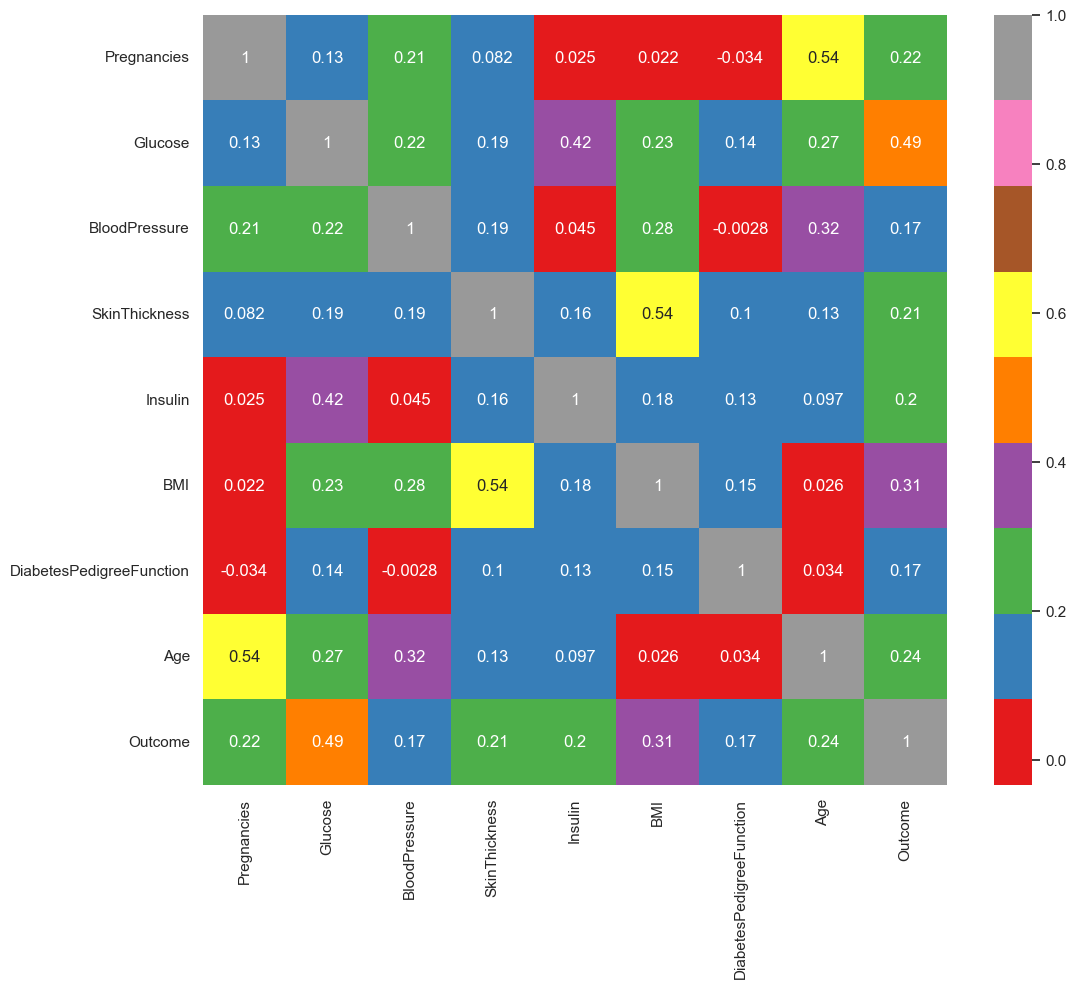

In [144]:
plt.figure(figsize = (12,10))
sns.heatmap(diabetes_data_copy.corr(), annot=True, cmap="Set1")

In [145]:
# dataframe bfore transformation

In [146]:
diabetes_data_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [147]:
# what to take to fill null in numerical column either mean() or median() depend on knowlege in 
# that  and data.

In [148]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

sc_X= StandardScaler()

In [149]:
sc_X

StandardScaler()

In [150]:
type(sc_X)

sklearn.preprocessing._data.StandardScaler

In [151]:
diabetes_data_copy.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [152]:
pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"], axis = 1)),
            columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1      -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2       1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3      -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4      -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.680125       0.297376       2.150354  0.455573  0.064737   
764    -0.547919  0.010298      -0.198965      -0.239949 -0.181541  0.632365   
765     0.342981 -0.022579      -0.033518      -0.695245 -0.332132 -0.910418   
766    -0.844885  0.141808      -1.026200      -0.012301 -0.181541 -0.342790   
767    -0.844885 -0.943143      -0.198965       0.215347 -0.181541 -0.299127   

     DiabetesPedigreeFunction       Age  
0                    0.468492  1.425995  
1                   -0.365061 -0.190672  
2                    0.604397 -0.105584  
3                   -0.920763 -1.041549  
4                    5.484909 -0.020496  
..                        ...       ...  
763                 -0.908682  2.532136  
764                 -0.398282 -0.531023  
765                 -0.685193 -0.275760  
766                 -0.371101  1.170732  
767                 -0.473785 -0.871374  

[768 rows x 8 columns]

In [153]:
X = pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"], axis = 1)),
                columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [154]:
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [155]:
type(X)

pandas.core.frame.DataFrame

In [158]:
y = diabetes_data_copy["Outcome"]   #assigning the label column

### Test, Train, split and Cross Validation method

In [159]:
# import train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1/3, random_state = 42, stratify = y)

In [168]:
type(X_train)

pandas.core.frame.DataFrame

In [169]:
type(y_train)

pandas.core.series.Series

In [173]:
tuple(range(1,15))

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)

In [177]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [183]:
print(train_scores)

[1.0, 0.84375, 0.8671875, 0.8359375, 0.828125, 0.8046875, 0.814453125, 0.802734375, 0.798828125, 0.802734375, 0.798828125, 0.79296875, 0.794921875, 0.796875]


In [184]:
print(test_scores)

[0.73046875, 0.73046875, 0.74609375, 0.7421875, 0.7421875, 0.72265625, 0.74609375, 0.74609375, 0.74609375, 0.73046875, 0.765625, 0.734375, 0.75, 0.734375]


In [185]:
# score that comes from testing on the same datapoints thatwere used for training

In [200]:
max_train_score = max(train_scores)

train_score_ind = [i for  i,v in enumerate(train_scores) if v == max_train_score]
print("Max train score {} % and k {} ".format(max_train_score*100, list(map(lambda x: x+1, train_score_ind))))

Max train score 100.0 % and k [1] 


In [195]:
list(map(lambda x: x+1, train_score_ind))

[1]

In [201]:
# score that comes from testing on the datapoints that were split in the beginning to be used 
# for testing solely

max_test_score = max(test_scores)
test_score_ind = [i for i,v in enumerate(test_scores) if v == max_test_score]

In [205]:
max_test_score*100

76.5625

In [207]:
print("Max test score {} % and k = {}".format(max_test_score*100, list(map(lambda x: x+1, test_score_ind))))

Max test score 76.5625 % and k = [11]


### Result Visualization

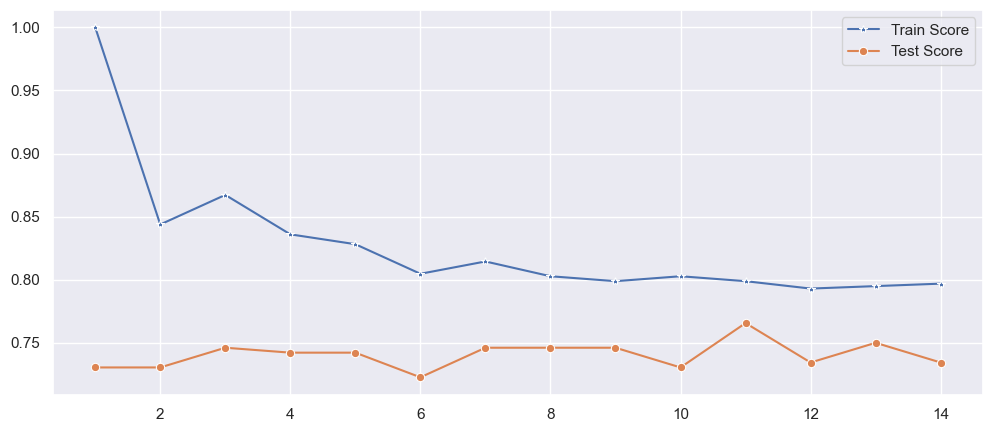

In [212]:
try:
    plt.figure(figsize=(12,5))
    p = sns.lineplot(range(1,15), train_scores, marker = '*', label = "Train Score")
    p = sns.lineplot(range(1,15), test_scores, marker = 'o', label = "Test Score")
except Exception as e:
    print(e)

In [213]:
# in the above graph the best resulyt in obtained  when k=11 so 11 is used for final model

In [215]:
# setup a knn classifier with k neighbors 

knn = KNeighborsClassifier(11)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.765625

In [230]:
# trying to plot decision boundry
X_test.columns.size

8

In [231]:
256*8

2048

In [228]:
count=0
for i in X_test.values:
    count+=1
print(count)

256


In [232]:
X_test.values

array([[ 0.3429808 , -1.10752965, -0.52985903, ..., -1.17240006,
        -0.39224185, -0.27575966],
       [ 0.93691372, -0.25271997, -0.52985903, ...,  0.05018291,
        -0.64593181,  0.74529338],
       [ 0.93691372, -0.25271997, -0.69530596, ..., -0.73576329,
         0.78560444,  0.06459135],
       ...,
       [ 3.31264542,  0.47058053, -0.19896517, ...,  0.67602895,
        -0.96304428,  0.83038113],
       [-0.54791859, -0.68012481, -1.19164676, ..., -1.20150918,
         0.42923043, -0.87137393],
       [-0.84488505, -1.07465235,  0.29737562, ..., -0.18269004,
        -0.84525965, -0.87137393]])

<function matplotlib.pyplot.show(close=None, block=None)>

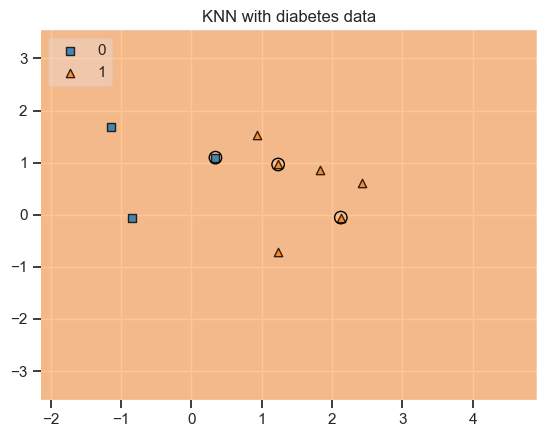

In [245]:
value = 20000
width = 20000

plot_decision_regions(X.values, y.values, clf=knn, legend = 2,
                     filler_feature_values={2: value, 3: value, 4: value, 5:value, 6:value, 7:value},
                     filler_feature_ranges={2: width, 3:width, 4:width, 5:width, 6:width, 7:width},
                     X_highlight = X_test.values)


plt.title("KNN with diabetes data")
plt.show

In [247]:
X.values

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [242]:
y.values

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

## Model Performance analysis

In [248]:
# importing confussion matrix

from sklearn.metrics import confusion_matrix

# let us get the prediction using the classifier we had fit above. Creating the confusion matrix
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [251]:
confusion_matrix(y_test, y_pred)


array([[142,  25],
       [ 35,  54]], dtype=int64)

In [254]:
pd.crosstab(y_test, y_pred)

col_0      0   1
Outcome         
0        142  25
1         35  54

In [253]:
pd.crosstab(y_test, y_pred, rownames=["True"], colnames = ["Predicted"], margins = True)

Predicted    0   1  All
True                   
0          142  25  167
1           35  54   89
All        177  79  256

In [256]:
# creating heatmap for confussion materix

y_pred = knn.predict(X_test)

from sklearn import metrics
cnn_matrix = metrics.confusion_matrix(y_test, y_pred)



In [258]:
type(cnn_matrix)

numpy.ndarray

Text(0.5, 20.049999999999997, 'Predicted label')

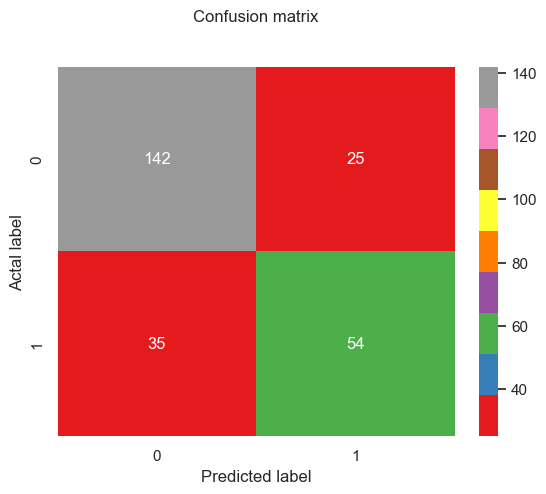

In [262]:
sns.heatmap(pd.DataFrame(cnn_matrix), annot = True, cmap = "Set1", fmt = 'g')

plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actal label")
plt.xlabel("Predicted label")

In [263]:
# Creating a HEATMAP for confussion matrix

In [265]:
y_pred = knn.predict(X_test)

In [266]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
#p = sns.heatmap(pd.DataFrame())

In [267]:
cnf_matrix

array([[142,  25],
       [ 35,  54]], dtype=int64)

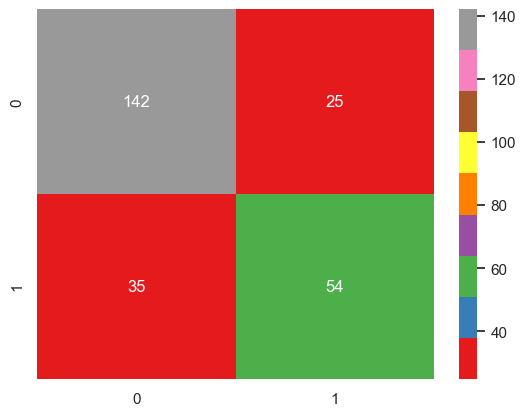

In [269]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "Set1", fmt='g')

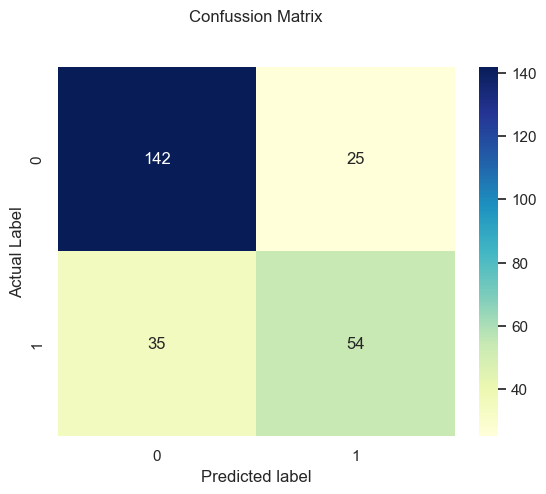

In [273]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt='g')
plt.title("Confussion Matrix", y = 1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted label")
plt.show()

### Classification report

In [274]:
# importing classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



### ROC - AUC

In [275]:
# ROC : Receiver Operating Characteristics

In [284]:
from sklearn.metrics import roc_curve
type(knn.predict_proba(X_test))

y_pred_proba = knn.predict_proba(X_test)[:,1]

In [285]:
y_pred_proba

array([0.        , 0.72727273, 0.36363636, 0.09090909, 0.45454545,
       0.27272727, 0.72727273, 0.90909091, 0.        , 0.18181818,
       0.54545455, 0.45454545, 0.45454545, 0.90909091, 0.63636364,
       0.72727273, 0.54545455, 0.        , 0.27272727, 0.72727273,
       0.09090909, 0.09090909, 0.18181818, 0.36363636, 0.09090909,
       0.27272727, 0.63636364, 0.27272727, 0.        , 0.09090909,
       0.45454545, 0.        , 0.27272727, 0.        , 0.        ,
       0.36363636, 0.18181818, 0.        , 0.        , 0.        ,
       0.45454545, 0.18181818, 0.27272727, 0.        , 0.90909091,
       0.18181818, 0.27272727, 0.63636364, 0.63636364, 0.        ,
       0.45454545, 0.        , 0.09090909, 0.        , 0.63636364,
       0.63636364, 0.        , 0.72727273, 0.36363636, 0.63636364,
       0.09090909, 0.81818182, 0.09090909, 0.09090909, 0.        ,
       0.        , 0.54545455, 0.45454545, 0.45454545, 0.63636364,
       0.27272727, 0.27272727, 0.54545455, 0.90909091, 0.18181

In [286]:
try:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    print("FPR")
    print(fpr)
    print("TPR")
    print(tpr)
    print("Thresholds")
    print(thresholds)
except Exception as e:
    print(e)

FPR
[0.         0.01197605 0.0239521  0.06586826 0.11976048 0.1497006
 0.20359281 0.28143713 0.37724551 0.52694611 0.67664671 1.        ]
TPR
[0.         0.04494382 0.14606742 0.25842697 0.39325843 0.60674157
 0.71910112 0.76404494 0.91011236 0.93258427 0.98876404 1.        ]
Thresholds
[1.90909091 0.90909091 0.81818182 0.72727273 0.63636364 0.54545455
 0.45454545 0.36363636 0.27272727 0.18181818 0.09090909 0.        ]


In [287]:
# PLotting the ROC curve

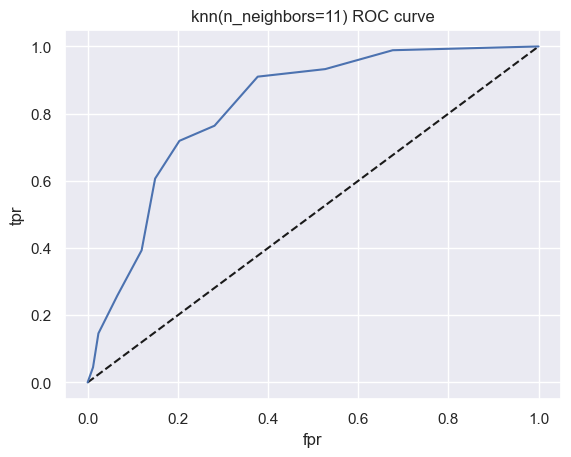

In [290]:
plt.plot([0,1],[0,1], "k--")
plt.plot(fpr, tpr, label = 'knn')

plt.xlabel('fpr')
plt.ylabel("tpr")

plt.title("knn(n_neighbors=11) ROC curve")
plt.show()

In [291]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_proba)

0.8193500639171096

In [292]:
# importing GridSearchCV
from sklearn.model_selection import GridSearchCV

# In case of Classifier like knn the parameter to be tuned is n_neighbors

param_grid = {"n_neighbors": np.arange(1,50)}


In [294]:
type(param_grid)

dict

In [295]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)

In [299]:
knn

KNeighborsClassifier()

In [298]:
knn_cv

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [300]:
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [301]:
print("Best Score: " +str(knn_cv.best_score_))
print("Best parameters: " +str(knn_cv.best_params_))

Best Score: 0.7721840251252015
Best parameters: {'n_neighbors': 25}


In [303]:
knn_cv.best_score_

0.7721840251252015

In [304]:
knn_cv.best_params_

{'n_neighbors': 25}

Exploratory data analysis and data Visualization is performed on Diabetic patient's data.